# LAB 4: Clustering (Unsupervised learning)

## Part I : Exercises

### Exercise 1

In [1]:
import pandas
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
d = [0.3, 0.4, 0.7,0.5, 0.8,0.45] # d should be a condensed distance matrix, like an object returned by pdist() function

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.45, 0.45, 0.0],
  [0.3, 0.8, 0.8, 0.45]],
 'ivl': [1, 2, 3, 4],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

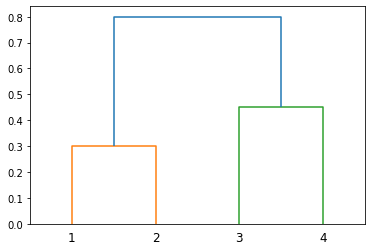

In [2]:
# a) complete linkage
exo1_hc_complete = linkage(d, "complete")
dendrogram(exo1_hc_complete,labels=[1,2,3,4])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.4, 0.4, 0.3],
  [0.0, 0.45, 0.45, 0.4]],
 'ivl': [4, 3, 1, 2],
 'leaves': [3, 2, 0, 1],
 'color_list': ['C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1']}

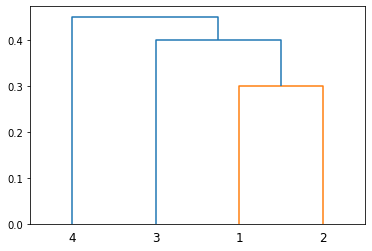

In [3]:
# b) complete single
exo1_hc_single = linkage(d, "single")
dendrogram(exo1_hc_single,labels=[1,2,3,4])

In [4]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(exo1_hc_complete, n_clusters = 2)) 
#c) (1,2), (3,4)
print(cut_tree(exo1_hc_single, n_clusters = 2)) 
#d) (1, 2, 3), (4)

[[0]
 [0]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [1]]


In [5]:
column_labels = ["sub-cluster","sub-cluster","distance","cluster size"]
df = pandas.DataFrame(exo1_hc_complete, columns=column_labels)
print(df)

   sub-cluster  sub-cluster  distance  cluster size
0          0.0          1.0      0.30           2.0
1          2.0          3.0      0.45           2.0
2          4.0          5.0      0.80           4.0


In [6]:
print("JOINS")
#print("sub-clusters","distance","cluster size")
df = pandas.DataFrame(exo1_hc_single, columns=column_labels)
print(df)

JOINS
   sub-cluster  sub-cluster  distance  cluster size
0          0.0          1.0      0.30           2.0
1          2.0          4.0      0.40           3.0
2          3.0          5.0      0.45           4.0


In [7]:
exo1_hc_complete[:,2] # to get the distances in the order the joins took place

array([0.3 , 0.45, 0.8 ])

### Exercise 2

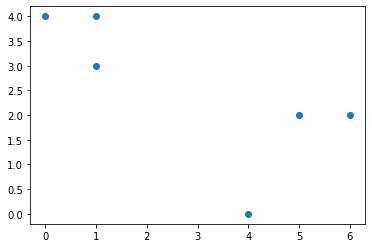

In [8]:
import matplotlib.pyplot as plt
X1 = [1, 1, 0, 5, 6, 4]
X2 = [4, 3, 4, 2, 2, 0]
#a)
plt.plot(X1,X2,"o")

In [9]:
#b)
from random import choice
l = [1, 2]  
labels = [choice(l) for x in range(0,len(X1))]
print(labels)

[1, 1, 1, 1, 1, 2]


[2.6, 3.0]
[4.0, 0.0]


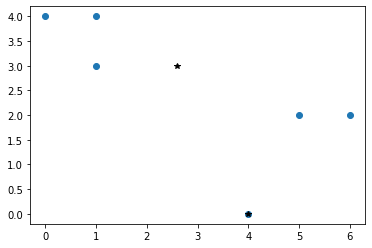

In [10]:
#c) centroids
def calculate_centroids(X,labels):
    centroid1, centroid2,n1,n2=[0,0],[0,0],0,0
    for i in range(0,len(X[0])):
        if labels[i]==1:
            centroid1[0]+=X[0][i]
            centroid1[1]+=X[1][i]
            n1+=1
        else: 
            centroid2[0]+=X[0][i]
            centroid2[1]+=X[1][i]
            n2+=1
    centroid1[0]=centroid1[0]*1.0/n1
    centroid1[1]=centroid1[1]*1.0/n1
    centroid2[0]=centroid2[0]*1.0/n2
    centroid2[1]=centroid2[1]*1.0/n2
    return[centroid1,centroid2]

X =[X1,X2]

c1,c2 =calculate_centroids(X,labels)[0],calculate_centroids(X,labels)[1]
print(c1)
print(c2)

plt.plot(X1,X2,"o")
plt.plot(c1[0],c1[1],"*",color="black")
plt.plot(c2[0],c2[1],"*",color="black")

In [11]:
# d)
import math
def dist(x,centroid):
    return(math.sqrt((x[0] - centroid[0])**2 + (x[1]-centroid[1])**2))
dist([X1[0],X2[0]],c1)

1.886796226411321

In [12]:
def assign_labels(X, centroid1, centroid2):
    labels = []
    for i in range(len(X[0])):
        if (dist([X[0][i],X[1][i]], centroid1) < dist([X[0][i],X[1][i]], centroid2)):
            labels.append(1)
        else:
            labels.append(2)
    return(labels)

X =[X1,X2]
labels = assign_labels(X, c1, c2)
print(labels)

[1, 1, 1, 2, 2, 2]


In [13]:
#e)
last_labels = []
while (not(last_labels == labels)): 
    last_labels = labels
    centroid1 = calculate_centroids(X,labels)[0]
    centroid2 = calculate_centroids(X,labels)[1]
    print(centroid1)
    print(centroid2)
    labels = assign_labels(X, centroid1, centroid2)


[0.6666666666666666, 3.6666666666666665]
[5.0, 1.3333333333333333]


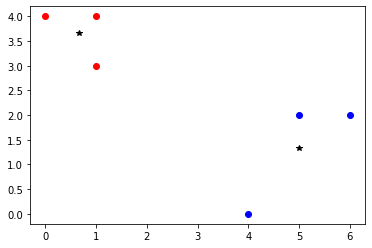

In [14]:
for i in range(len(X[0])):
    if labels[i] ==1:
        col="red"
    else:
        col="blue"
    plt.plot(X[0][i],X[1][i],"o",color=col)
        
plt.plot(centroid1[0],centroid1[1],"*",color="black")
plt.plot(centroid2[0],centroid2[1],"*",color="black")

## Part II : Practical applications

### Exercise 1

Text(0, 0.5, 'X2')

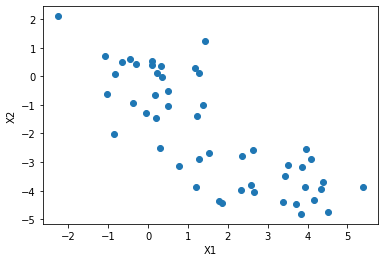

In [15]:
# a)
# The simulated data will consist in 50 observations described by two normal-distributed va-riables. 
# In order to define classes in the data the first 25 observations have a mean shift relative to the next 25 observations.

import numpy as np

X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

# You can plot the observations and notice that there are two well separated clusters: 

import matplotlib.pyplot as plt
plt.plot(X[:,0],X[:,1],"o")
plt.xlabel("X1")
plt.ylabel("X2")

In [16]:
# b) 
# Perform K-means clustering with K = 2 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=100).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 3.09619678 -3.67694588]
 [ 0.05298726 -0.23920398]]


Text(0, 0.5, 'X2')

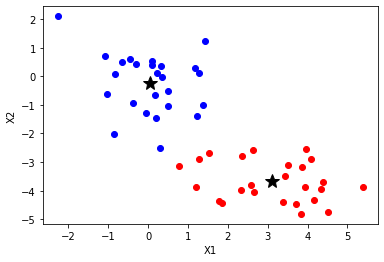

In [17]:
# plot the observations using different color per cluster
for i in range(len(X)):
    if labels[i] == 0:
        plt.plot(X[i,0],X[i,1],"o",color="red")
    else:
        plt.plot(X[i,0],X[i,1],"o",color="blue")

centroid1 = centroids[0]
centroid2 = centroids[1]
plt.plot(centroid1[0], centroid1[1], "*", color="black", markersize=15)
plt.plot(centroid2[0], centroid2[1], "*", color="black", markersize=15)    

plt.xlabel("X1")
plt.ylabel("X2")


In [18]:
# c)
dfHVC = pandas.read_csv("HCVdata.csv", sep=";")

# How many observations are there?
print(dfHVC.shape)


(567, 13)


In [19]:
# How many variables are there (numberic, categorical, etc.)? What type of variables (numeric, categorical) ?
print(dfHVC.info())

# 'Unnamed 0' can be ignored because it does not contain any relevant information by looking into the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  567 non-null    int64  
 1   Category    567 non-null    object 
 2   Sex         567 non-null    object 
 3   Age         567 non-null    int64  
 4   ALB         567 non-null    float64
 5   ALT         567 non-null    float64
 6   AST         567 non-null    float64
 7   BIL         567 non-null    float64
 8   CHE         567 non-null    float64
 9   CHOL        567 non-null    float64
 10  CREA        567 non-null    float64
 11  GGT         567 non-null    float64
 12  PROT        567 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 57.7+ KB
None


In [20]:
# Numner of levels for Category variable and Sex variable
print(dfHVC["Category"].value_counts())
print(dfHVC["Sex"].value_counts())


0=Blood Donor    496
3=Cirrhosis       28
1=Hepatitis       23
2=Fibrosis        20
Name: Category, dtype: int64
m    342
f    225
Name: Sex, dtype: int64


In [21]:
# d)

dfHVC.replace('0=Blood Donor', 0, inplace=True)
dfHVC.replace('1=Hepatitis',   1, inplace=True)
dfHVC.replace('2=Fibrosis',    2, inplace=True)
dfHVC.replace('3=Cirrhosis',   3, inplace=True)

dfHVC.replace('m', 0, inplace=True)
dfHVC.replace('f', 1, inplace=True)


# dfHVC.drop(['Unnamed: 0', 'Category', 'Sex'], axis='columns', inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfHVC_scaled = scaler.fit_transform(dfHVC)

print(dfHVC)

print(dfHVC.info())

     Unnamed: 0  Category  Sex  Age   ALB    ALT    AST   BIL    CHE  CHOL  \
0             1         0    0   32  38.5    7.7   22.1   7.5   6.93  3.23   
1             2         0    0   32  38.5   18.0   24.7   3.9  11.17  4.80   
2             3         0    0   32  46.9   36.2   52.6   6.1   8.84  5.20   
3             4         0    0   32  43.2   30.6   22.6  18.9   7.33  4.74   
4             5         0    0   32  39.2   32.6   24.8   9.6   9.15  4.32   
..          ...       ...  ...  ...   ...    ...    ...   ...    ...   ...   
562         611         3    1   62  32.0    5.9  110.3  50.0   5.57  6.30   
563         612         3    1   64  24.0    2.9   44.4  20.0   1.54  3.02   
564         613         3    1   64  29.0    3.5   99.0  48.0   1.66  3.63   
565         614         3    1   46  33.0   39.0   62.0  20.0   3.56  4.20   
566         615         3    1   59  36.0  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0 

In [22]:
# convert dfHVC_scaled to a DataFrame
dfHVC_scaled = pandas.DataFrame(dfHVC_scaled)
type(dfHVC_scaled)

pandas.core.frame.DataFrame

In [23]:
dfHVC_Kmeans4 = KMeans(n_clusters=4, n_init=50, random_state=1000).fit(dfHVC_scaled)
print(dfHVC_Kmeans4.cluster_centers_)

pandas.crosstab(
    index = dfHVC.Category,
    columns = dfHVC_Kmeans4.labels_, 
    rownames = ['Real gropus'], 
    colnames = ['K-means clusters']
)


[[-0.74402359 -0.2849896  -0.81110711 -0.09012226  0.29987275  0.12267474
  -0.16654523 -0.07542246  0.32369238  0.09141497  0.0624103  -0.10264459
   0.12027752]
 [ 0.69002503 -0.26591425  1.20436201  0.02870255 -0.2228259  -0.28812162
  -0.29926148 -0.23667041 -0.18648907  0.09826732 -0.23351798 -0.26432636
  -0.16397195]
 [ 1.5698393   2.88097981 -0.27789235  0.47617588 -0.83639568  0.61427835
   2.50262982  1.61116877 -1.19122754 -0.99748044 -0.0999219   1.80610588
   0.11130279]
 [ 1.62371945  3.66611412 -0.12977714 -0.2560313  -1.49322452 -1.16036722
  -0.10551584 -0.12554003 -1.06239165 -0.98070346 11.96415034  1.61686925
  -2.10334925]]


K-means clusters,0,1,2,3
Real gropus,,,,
0,289,207,0,0
1,14,3,6,0
2,0,5,15,0
3,0,0,25,3


As we can see there are no values only on the main diagonal, meaning that the clusters are not perfect. For example, 14 objects that should be part of group 0 were included in group 0. We have a perfect grouping only when there are values different than 0 only on the main diagonal.

We can only use 4 cluster because there are only 4 categories. The numbner of clusters should be equal to the number of categories. 

In [24]:
# f) According to the results obtained in the previous question, do you think it is suitable to run K−means with another value of K ? If so, perform once more K-means with this value and interpret the results.
dfHVC_Kmeans5 = KMeans(n_clusters=5, n_init=50, random_state=1000).fit(dfHVC_scaled)
print(dfHVC_Kmeans5.cluster_centers_)

pandas.crosstab(
    index = dfHVC.Category, 
    columns = dfHVC_Kmeans5.labels_, 
    rownames = ['Real gropus'], 
    colnames = ['K-means clusters']
)



[[ 1.47516066e+00  2.12580573e+00 -1.29777137e-01 -1.85816922e-01
   1.21149041e-01  1.71964321e+00  1.69220786e+00  1.74668025e-01
   7.49675604e-03 -6.05616075e-01 -1.49845712e-01  9.49200428e-01
   9.53469937e-01]
 [-7.79213664e-01 -3.06396169e-01 -8.11107106e-01 -6.28854238e-02
   2.95943671e-01  1.00909259e-01 -1.85357029e-01 -8.48340133e-02
   3.17415693e-01  8.42619468e-02  6.61746188e-02 -1.15068834e-01
   9.63081753e-02]
 [ 6.81176533e-01 -2.90008135e-01  1.19431695e+00  3.46325968e-02
  -2.27191935e-01 -3.13430278e-01 -3.13379839e-01 -2.37202177e-01
  -1.94862020e-01  1.14045702e-01 -2.35355471e-01 -2.74714158e-01
  -1.92978622e-01]
 [ 1.63091437e+00  3.43348173e+00 -2.77892348e-01  7.67452710e-01
  -1.85765858e+00 -8.34291471e-01  2.88164316e+00  3.03546679e+00
  -2.30563766e+00 -1.22563427e+00  6.80662516e-01  2.60060855e+00
  -8.09912546e-01]
 [ 1.60491454e+00  3.66611412e+00 -8.11107106e-01 -1.21708146e-01
  -1.29829467e+00 -1.18326220e+00 -4.47731551e-01 -1.23833704e-02


K-means clusters,0,1,2,3,4
Real gropus,,,,,
0,1,289,206,0,0
1,9,9,3,2,0
2,17,0,3,0,0
3,6,0,0,21,1


Clusterization can not be done correctly because the number of cluster is different than the number of categories. IF number of clusters <> nonumber of groups then we can't obtain a sqare matching matrix therefore the diagonal will not be perfect. In other worjds - when the number of categories ig greather than the number of clusters, the inevitable there will be at leat a cluster that included more than one category.  

### Exercise 2

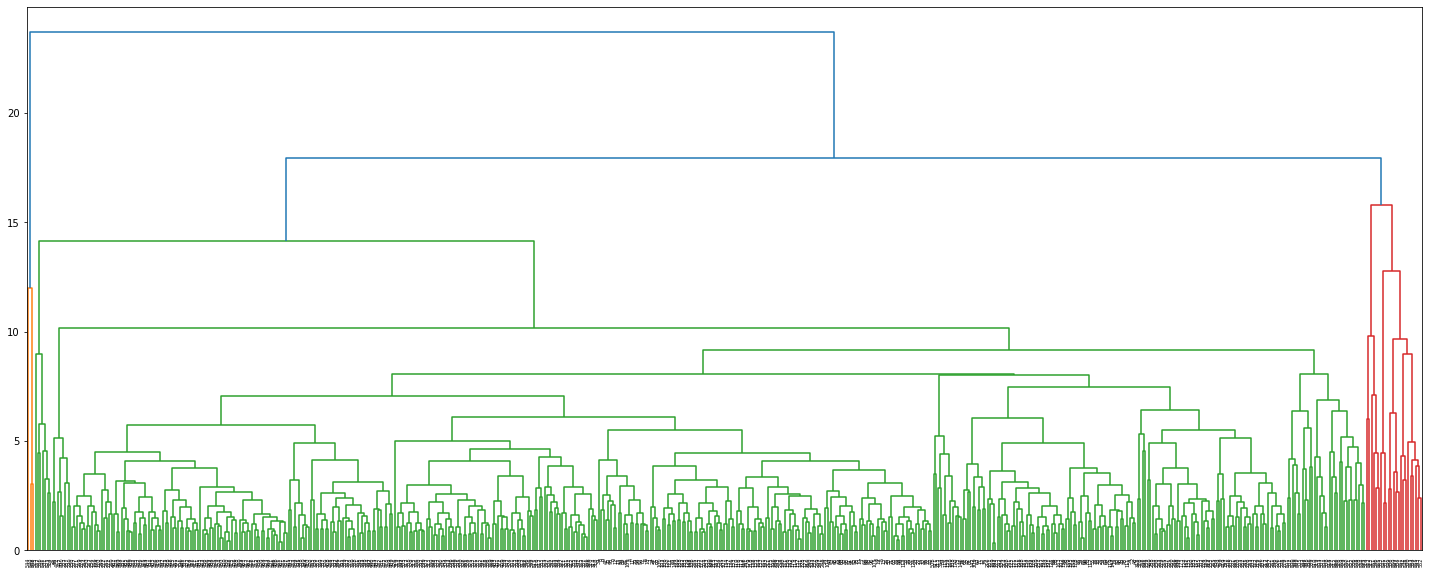

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

hc_complete = linkage(dfHVC_scaled, method='complete')
plt.figure(figsize=(25, 10))
dendrogram(hc_complete)
plt.show()


In [26]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

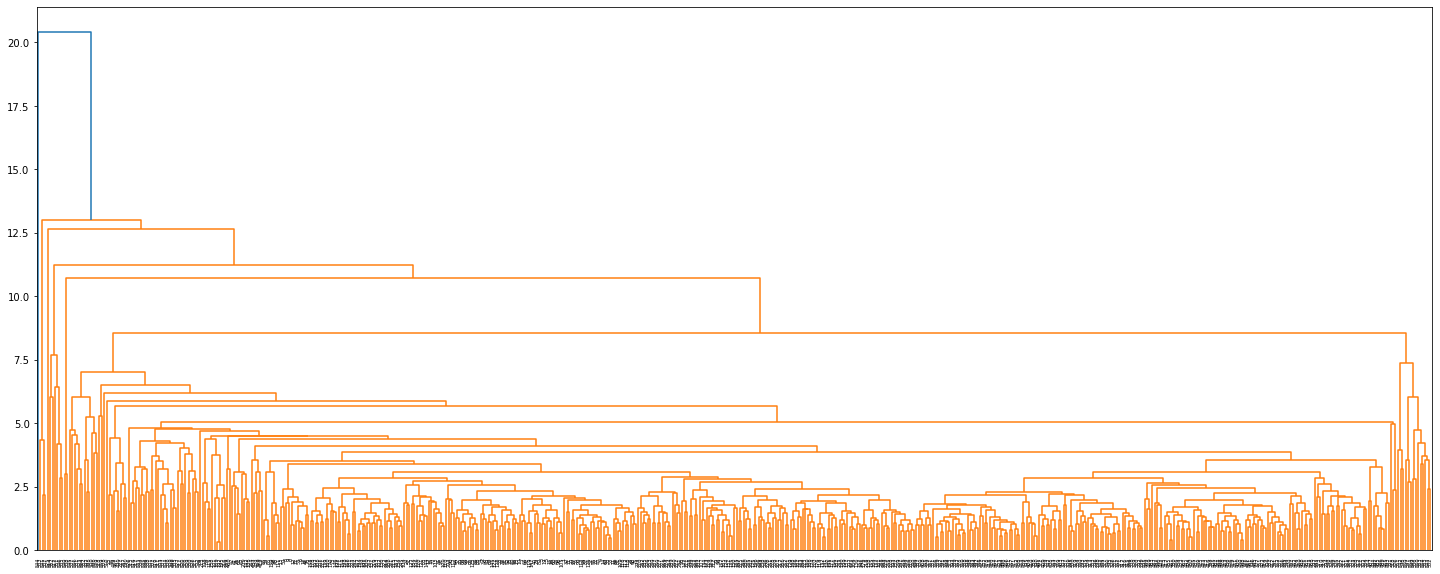

In [27]:
# a) 
# average linkage
hc_average = linkage(dfHVC_scaled, method='average')
plt.figure(figsize=(25, 10))
dendrogram(hc_average)
plt.show()


In [28]:
print(cut_tree(hc_average, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

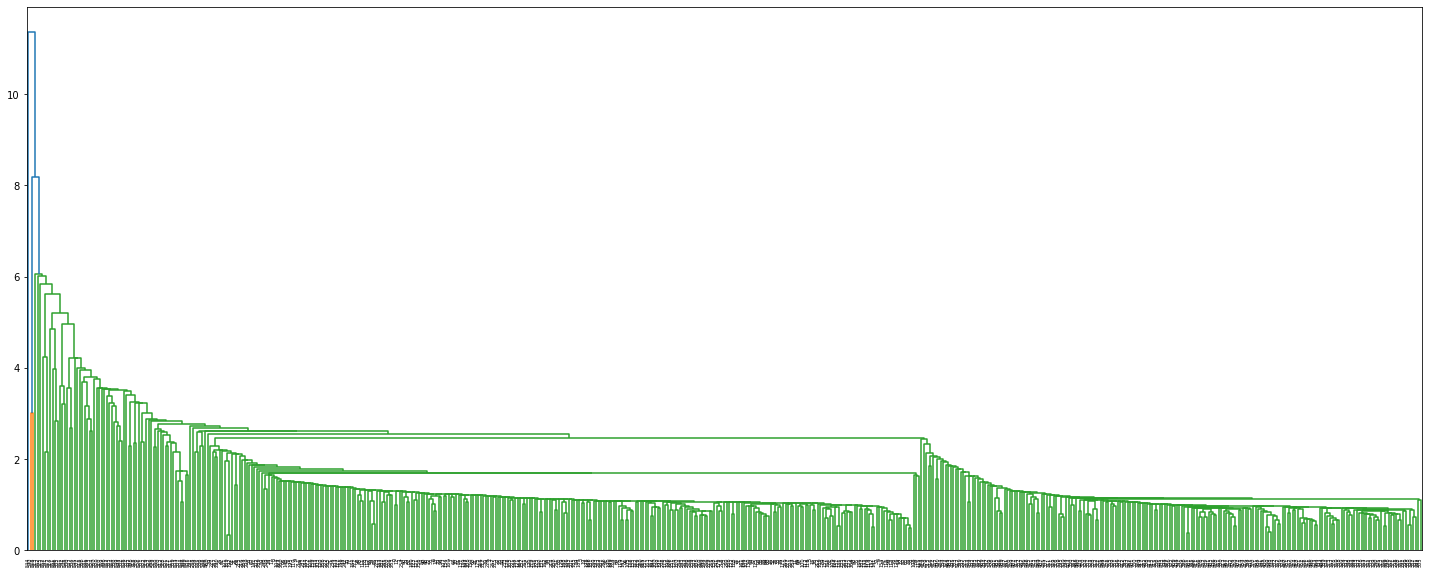

In [29]:
# single linkage
hc_single = linkage(dfHVC_scaled, method='single')
plt.figure(figsize=(25, 10))
dendrogram(hc_single)
plt.show()


In [30]:
print(cut_tree(hc_single, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The cut trees from average and single linkage are very similar. With these types of linkage, there are two clusters that have only one object. Complete linkage gave us slightly bigger clusters labeled as 1, 2, and 3. 

In [31]:
# b) 

dfHVC_Kmeans2 = KMeans(n_clusters=2, n_init=50, random_state=1000).fit(dfHVC_scaled)
print(dfHVC_Kmeans2.cluster_centers_)

pandas.crosstab(
    index = dfHVC.Category, 
    columns = dfHVC_Kmeans2.labels_, 
    rownames = ['Real gropus'], 
    colnames = ['K-means clusters']
)

[[ 1.57160815  2.89440091 -0.18218713  0.40912661 -0.85220521  0.49876425
   2.2316289   1.41404343 -1.09690628 -1.00126166  0.59624133  1.71839366
   0.04172635]
 [-0.15868665 -0.29225019  0.01839559 -0.04130987  0.0860479  -0.05036066
  -0.22532952 -0.1427772   0.11075559  0.10109826 -0.06020301 -0.17350771
  -0.00421315]]


K-means clusters,0,1
Real gropus,,
0,0,496
1,6,17
2,18,2
3,28,0


We can cut the dendrogram in a different number from 4, but we can't obtain a perfect grouping in this case. But, if we want to get only two clusters, for example, we can do this and we will get two clusters each including the other smaller ones. After displaying the matching matrix with 2 clusters, we observe that more than one group was includded in the same cluster. For example, in cluster 0 were included 6 objects from group 1, 18 from group 2 and 28 from group 3. 